## M2_Assignment

### Introduction:
The objective of this assignment is to forecast a vehicle's curb weight based on a collection of explanatory variables using exploratory data analysis (EDA) and linear regression models. The goals are to draw conclusions from the data, find connections between the explanatory variables and the response variable, and assess how well the models predict the future using Linear Regression.

In conducting this analysis, the following steps will be taken:

* To examine the characteristics of each variable, including the response variable (curb-weight), exploratory data analysis (EDA) will be used. For the numerical variables, statistical metrics like mean, standard deviation, minimum, maximum, quartiles, and count will be computed. To further illustrate links and trends in the data, exploratory graphics such bar graphs, box plots, histograms etc. will be produced.

* By examining the connections between the explanatory variables and the response variable, preliminary predictive conclusions will be found.

* A minimum of three explanatory variables will be included in the linear regression models that will be built. These variables will be chosen depending on the knowledge acquired through the EDA.. 

* Linear Regression will be used to evaluate the models' performance. On the basis of industry standards and the size of the dataset, the cross-validation 'K' value will be chosen. Based on the average $R^2$ scores obtained from the cross-validation process, this procedure will allow for the estimation of the models' generalization performance and the selection of the preferred model.

These processes will enable a complete EDA, precise linear regression model construction, and Linear Regression evaluation of the predictive performance.

In [5]:
# ! pip install plotnine

### Importing libraries

In [1]:
from plotnine import ggplot, aes, geom_boxplot, facet_wrap, labs,theme_minimal
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.subplots as sp
%matplotlib inline




### Dataset Overview

The automobile dataset is a publicly available dataset that contains information about 205 used cars. The dataset has 26 columns, including the following:

* symboling: A symbolic rating of the insurance risk associated with the vehicle.
* normalized-losses: The relative average loss payment per insured vehicle year.
* make: The make of the vehicle.
* fuel-type: The type of fuel used by the vehicle (e.g., gasoline, diesel, electric).
* aspiration: The aspiration of the vehicle engine (e.g., turbocharged, supercharged, naturally aspirated).
* num-of-doors: The number of doors on the vehicle.
* body-style: The body style of the vehicle (e.g., sedan, coupe, hatchback, SUV).
* drive-wheels: The type of drive system used by the vehicle (e.g., front-wheel drive, rear-wheel drive, all-wheel drive).
* engine-location: The location of the engine in the vehicle (e.g., front, rear).
* wheel-base: The distance between the front and rear axles of the vehicle.
* length: The overall length of the vehicle.
* width: The overall width of the vehicle.
* height: The overall height of the vehicle.
* curb-weight: The weight of the vehicle without passengers or cargo.
* engine-type: The type of engine used in the vehicle (e.g., V6, V8, inline-4).
* num-of-cylinders: The number of cylinders in the engine.
* engine-size: The displacement of the engine in cubic centimeters.
* fuel-system: The type of fuel system used in the vehicle (e.g., carburetor, fuel injection).
* bore: The diameter of the cylinders in the engine.
* stroke: The distance that the piston travels in the cylinder.
* compression-ratio: The ratio of the volume of the cylinder when the piston is at the bottom to the volume of the cylinder  when the piston is at the top.
* horsepower: The horsepower of the engine.
* peak-rpm: The revolutions per minute at which the engine produces its maximum horsepower.
* city-mpg: The fuel economy of the vehicle in the city in miles per gallon.* 
* highway-mpg: The fuel economy of the vehicle on the highway in miles per gallon.
* price: The price of the vehicle.

The automobile dataset can be used for a variety of tasks, such as:

* Exploratory data analysis to gain insights into the characteristics of used cars.
* Machine learning to build models to predict the price of used cars, or other metrics such as fuel economy or insurance risk.
* Data visualization to create charts and graphs that illustrate the relationships between different variables in the dataset.

The automobile dataset is a valuable resource for anyone interested in learning more about used cars or data science.

In [7]:
#Hint: Need some help getting started? Use this code to read the data. Replace url with data on your own GitHub repo.
#Follow instructions on where do download the data in the assignment. (https://archive.ics.uci.edu/dataset/10/automobile)


column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
                "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-cylinders", "engine-size",
                "fuel-system", "bore", "stroke", "compression-ratio", "horse-power", "peak-rpm", "city-mpg", "highway-mpg", "price"]
usecols = ['height', 'width', 'length', 'wheel-base',
           'engine-size', 'horse-power', 'peak-rpm', 'city-mpg','curb-weight']
url = "https://raw.githubusercontent.com/samyogkc/Data-Science/main/M2_assignment/data/automobile/imports-85.data"

df_make = pd.read_csv(url, sep=",", names=column_names, usecols=['make'])
df = pd.read_csv(url, sep=",", names=column_names, usecols=usecols)
df.head(10)


,wheel-base,length,width,height,curb-weight,engine-size,horse-power,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,2548,130,111,5000,21
1,88.6,168.8,64.1,48.8,2548,130,111,5000,21
2,94.5,171.2,65.5,52.4,2823,152,154,5000,19
3,99.8,176.6,66.2,54.3,2337,109,102,5500,24
4,99.4,176.6,66.4,54.3,2824,136,115,5500,18
5,99.8,177.3,66.3,53.1,2507,136,110,5500,19
6,105.8,192.7,71.4,55.7,2844,136,110,5500,19
7,105.8,192.7,71.4,55.7,2954,136,110,5500,19
8,105.8,192.7,71.4,55.9,3086,131,140,5500,17
9,99.5,178.2,67.9,52.0,3053,131,160,5500,16


### Data cleansing

In [8]:
auto_df = df.copy()


In [9]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheel-base   205 non-null    float64
 1   length       205 non-null    float64
 2   width        205 non-null    float64
 3   height       205 non-null    float64
 4   curb-weight  205 non-null    int64  
 5   engine-size  205 non-null    int64  
 6   horse-power  205 non-null    object 
 7   peak-rpm     205 non-null    object 
 8   city-mpg     205 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.5+ KB


In [10]:
df_temp = auto_df[auto_df['horse-power']!='?']
normalised_mean = df_temp['horse-power'].astype(float).mean()
auto_df['horse-power'] = auto_df['horse-power'].replace('?',normalised_mean).astype(float)


df_temp = auto_df[auto_df['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(float).mean()
auto_df['peak-rpm'] = auto_df['peak-rpm'].replace('?',normalised_mean).astype(float)

In [11]:
auto_df.isnull().sum()

wheel-base     0
length         0
width          0
height         0
curb-weight    0
engine-size    0
horse-power    0
peak-rpm       0
city-mpg       0
dtype: int64

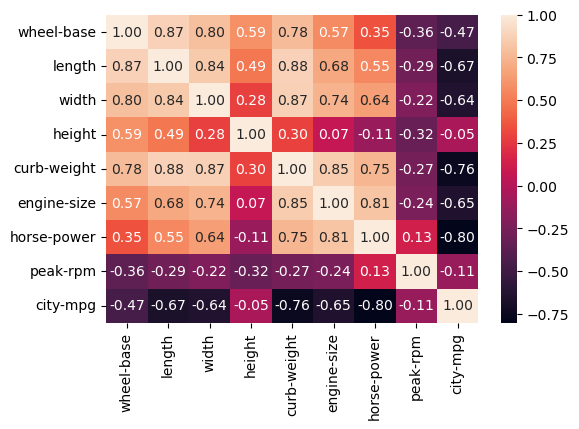

In [12]:

corr = auto_df.corr()
plt.figure(figsize=(6,4))
a = sns.heatmap(corr, annot=True, fmt='.2f')


Here are some observations based on the correlation matrix;

The variables of wheelbase, length, width and curb weight show a correlation, with each other. This suggests that larger cars generally tend to be heavier and have wheelbases.
Similarly engine size and horsepower also exhibit a correlation, which is expected.
In terms of fuel efficiency city MPG demonstrates a correlation with other variables. This indicates that larger cars with engines and higher weights tend to have fuel efficiency.

Lets explore examples that can help us interpret the correlation coefficients.

 The strong positive correlation of 0.87 between wheelbase and length implies that cars with wheelbases are generally longer overall.Likewise the strong positive correlation of 0.81 between engine size and horsepower suggests that cars with bigger engines tend to possess more horsepower.On the hand the strong negative correlation of 0.76, between city MPG and weight indicates that heavier cars typically have less fuel efficiency.

It's important to remember that while variables may be correlated it doesn't necessarily mean one causes the other; correlation does not imply causation.For instance there is a correlation, between the city MPG and weight of a vehicle. However it remains unclear whether the weight directly affects fuel efficiency. It is plausible that there could be another factor, like engine type that influences both weight and fuel efficiency variations.

In [13]:
auto_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheel-base   205 non-null    float64
 1   length       205 non-null    float64
 2   width        205 non-null    float64
 3   height       205 non-null    float64
 4   curb-weight  205 non-null    int64  
 5   engine-size  205 non-null    int64  
 6   horse-power  205 non-null    float64
 7   peak-rpm     205 non-null    float64
 8   city-mpg     205 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 14.5 KB


In [14]:
auto_df.describe()

,wheel-base,length,width,height,curb-weight,engine-size,horse-power,peak-rpm,city-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,104.256158,5125.369458,25.219512
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,39.519211,476.979093,6.542142
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,48.000000,4150.000000,13.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,70.000000,4800.000000,19.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,95.000000,5200.000000,24.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,116.000000,5500.000000,30.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,288.000000,6600.000000,49.000000


## EDA

To visualize the distributions of numerical variables using histograms and box plots in Python, you can use libraries such as Matplotlib, Seaborn, or Plotly.

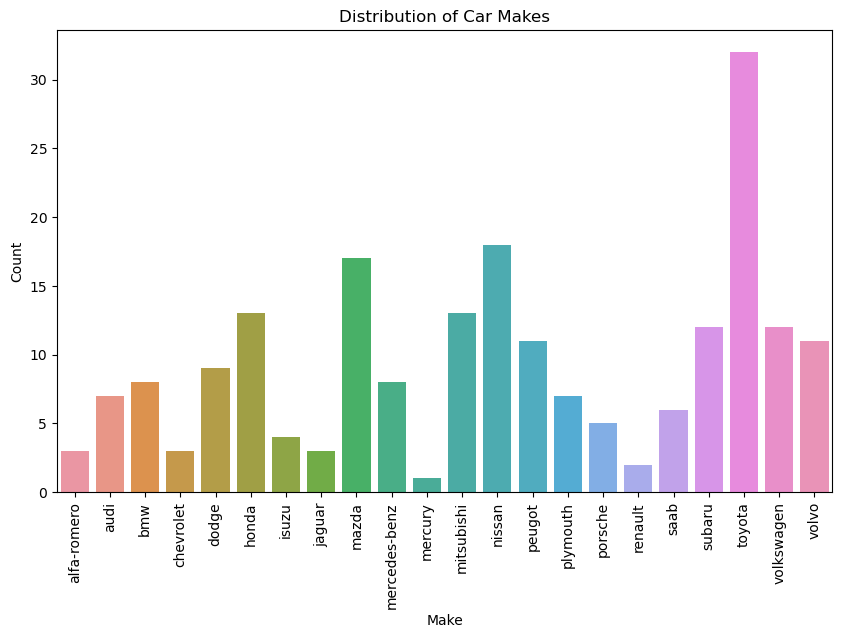

In [15]:
plt.figure(figsize=(10, 6),dpi=100)
sns.countplot(x='make', data=df_make)
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Distribution of Car Makes')
plt.xticks(rotation=90)
plt.show()

In above bar diagram we can see that the toyota has the highest number of count and mercury has the lowest.

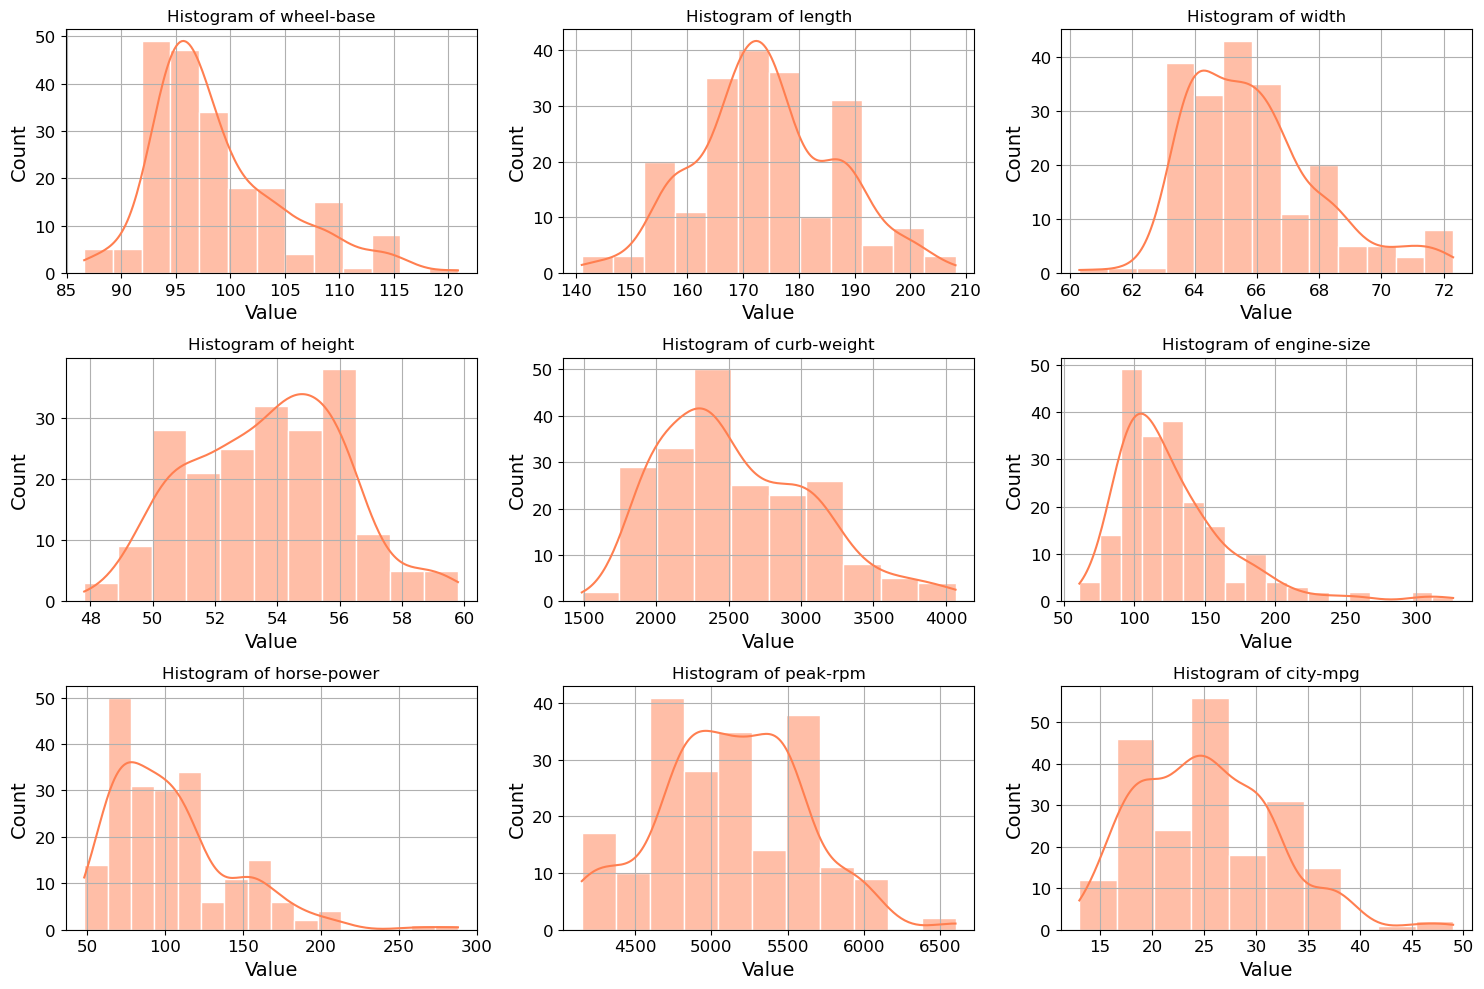

In [16]:
# Create a figure and grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Iterate over the numeric columns in the DataFrame and create a histogram for each column
for col_idx, col in enumerate(auto_df.select_dtypes(include=['number'])):
    # Get the current subplot
    ax = axes[col_idx // 3, col_idx % 3]

    # Create the histogram
    sns.histplot(data=auto_df[col], kde=True, ax=ax,
                 color='coral', edgecolor='white')

    # Set the subplot title
    ax.set_title('Histogram of {}'.format(col))

    # Add grid lines to the subplot
    ax.grid(True)

    # Adjust the font size and style
    ax.tick_params(labelsize=12)
    ax.set_xlabel('Value', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()


The histograms in the image show the following:

Most cars have wheelbases between 92 and 105 inches, lengths between 155 and 180 inches , widths between 63 and 68 inches, and heights between 50 and 56 inches.
Most cars weigh between 2,00 and 3,500 pounds, have engine sizes between 1 and 2 liters, and have horsepower between 60 and 110.
Most cars have peak RPMs between 45,00 and 55,00 RPM and city MPG ratings between 16 and 35 MPG.

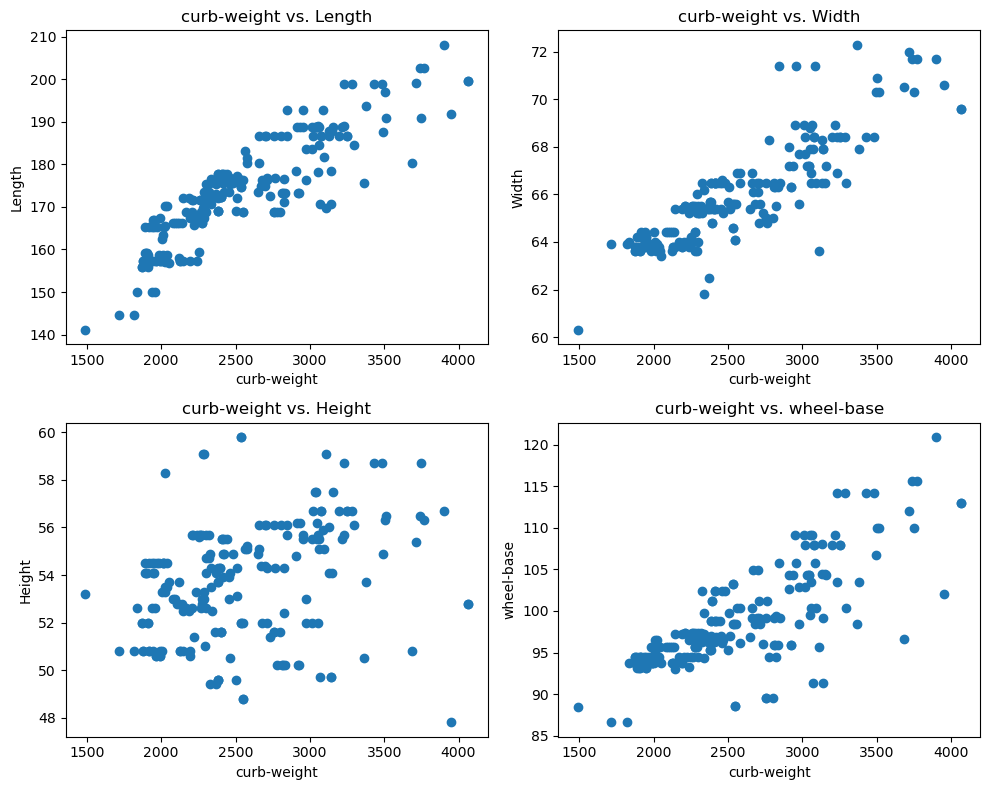

In [17]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the scatter plots for 'wheel-base' against other columns
axes[0, 0].scatter(auto_df['curb-weight'], auto_df['length'])
axes[0, 1].scatter(auto_df['curb-weight'], auto_df['width'])
axes[1, 0].scatter(auto_df['curb-weight'], auto_df['height'])
axes[1, 1].scatter(auto_df['curb-weight'], auto_df['wheel-base'])

# Add labels and titles
axes[0, 0].set_xlabel('curb-weight')
axes[0, 0].set_ylabel('Length')
axes[0, 0].set_title('curb-weight vs. Length')

axes[0, 1].set_xlabel('curb-weight')
axes[0, 1].set_ylabel('Width')
axes[0, 1].set_title('curb-weight vs. Width')

axes[1, 0].set_xlabel('curb-weight')
axes[1, 0].set_ylabel('Height')
axes[1, 0].set_title('curb-weight vs. Height')

axes[1, 1].set_xlabel('curb-weight')
axes[1, 1].set_ylabel('wheel-base')
axes[1, 1].set_title('curb-weight vs. wheel-base')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Height,length,wheelbase,width and curb weight have a positive relationship according to the scatter plot. This indicates that a vehicle's curb weight tends to increase along with its height,length and wheelbase. However, there is some fluctuation in the data and the correlation is not exact. This is due to the fact that curb-weight is influenced by a number of different variables, including the type of vehicle, the materials used to construct it, and the features it possesses.

Specific findings from the scatter plot include the following:

* The tallest cars are often the heaviest cars.
* There is a collection of quite short and light automobiles in the lower left corner of the plot. These are probably automobiles.
* Another group of automobiles, quite tall and heavy, is gathered in the plot's upper right corner. These are probably trucks and SUVs.

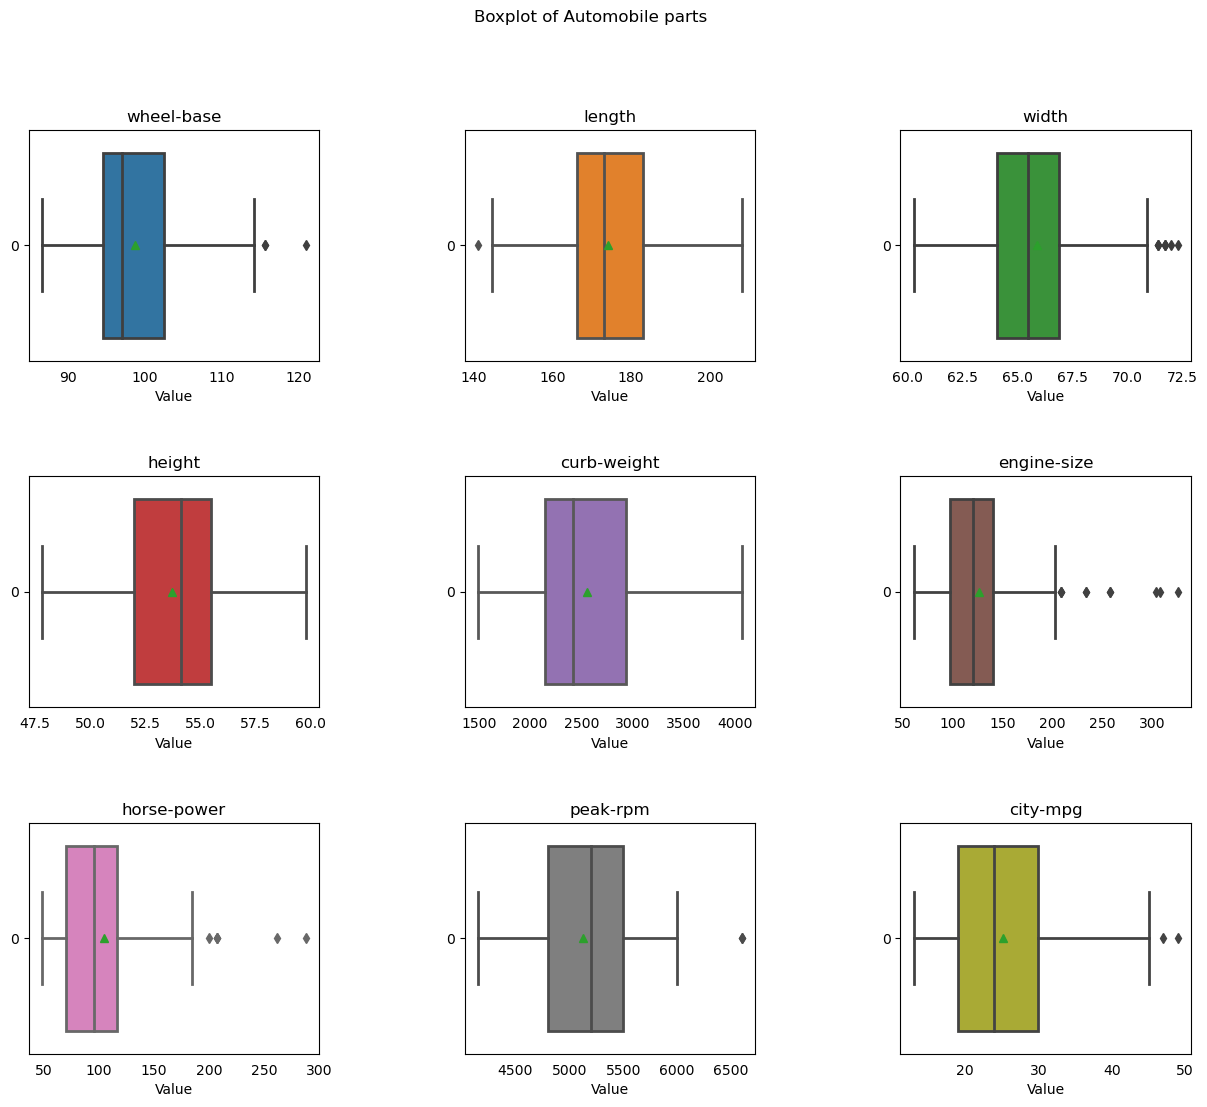

In [22]:
# Create a figure and grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables = list(auto_df.keys())

# Create a color palette for the boxplots
palette = sns.color_palette('tab10', n_colors=len(variables))

# Iterate over the variables and create a boxplot for each variable
for i, variable in enumerate(variables):
    # Get the current subplot
    ax = axes[i // 3, i % 3]

    # Create the boxplot
    sns.boxplot(
        data=auto_df[variable],
        orient='h',
        showmeans=True,
        color=palette[i],
        linewidth=2,
        ax=ax,
    )

    # Set the subplot title
    ax.set_title(variable)

    # Set the x-axis label
    ax.set_xlabel('Value')

    # Customize the x-axis ticks
    ax.tick_params(bottom=False)

# Add a title to the plot
fig.suptitle('Boxplot of Automobile parts')

# Show the plot
plt.show()

### Machine Learning

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).



In [19]:
# Select explanatory variables (features) based on your EDA work
# For Model 1, let's use 'engine-size', 'horsepower', and 'city-mpg' as explanatory variables
# For Model 2, let's use 'length', 'width', and 'wheel-base' as explanatory variables

# Model 1
X1 = auto_df[['engine-size', 'horse-power', 'city-mpg']]
y = auto_df['curb-weight']

# Model 2
X2 = auto_df[['length', 'width', 'wheel-base']]

In [20]:
# Standardize the features for better model performance
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.fit_transform(X2)

In [21]:
# Function to perform K-fold cross-validation and return the average R^2 score
def evaluate_model(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    return np.mean(r2_scores)


# Create and evaluate Model 1
model1 = LinearRegression()
model1_avg_r2 = evaluate_model(model1, X1_scaled, y)
print(f"Model 1 Average R^2 Score: {model1_avg_r2:.4f}")

# Create and evaluate Model 2
model2 = LinearRegression()
model2_avg_r2 = evaluate_model(model2, X2_scaled, y)
print(f"Model 2 Average R^2 Score: {model2_avg_r2:.4f}")

# Compare and select the preferred model based on R^2 scores
if model1_avg_r2 > model2_avg_r2:
    preferred_model = model1
    print("Model 1 is preferred.")
else:
    preferred_model = model2
    print("Model 2 is preferred.")


Model 1 Average R^2 Score: 0.7661
Model 2 Average R^2 Score: 0.8159
Model 2 is preferred.


The $R^2$ score, commonly referred to as the coefficient of determination, is a statistical indicator that shows how much of the variance in the dependent variable (curb-weight) in a linear regression model can be accounted for by the independent variables. It has a score range of 0 to 1, with 0 denoting no link between the variables and 1 denoting a perfect fit.

In this instance, Model 2 outperforms Model 1 in terms of average $R^2$ score (0.8159 vs. 0.7661, respectively). This indicates that compared to Model 1, Model 2 explains a greater percentage of the variance in curb-weight. Therefore, as Model 2 offers a better fit to the data, it is preferred.

The following is an interpretation of the $R^2$ score:

A model does not explain any variance in the dependent variable if it receives a $R^2$ score of 0.
A score of 1 for $R^2$ indicates that the model completely accounts for the variance in the dependent variable.
It's vital to remember that the $R^2$ score by itself does not reflect the model's overall validity or quality. When assessing the model's performance, additional elements such the coefficients' importance and the presence of multicollinearity should also be taken into account.


Reference: https://www.ibm.com/topics/linear-regression